# LOGISTIC REGRESSION CASE STUDY

# 1. Reading and Understanding the data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading dataset
lead_data = pd.read_csv(r'C:\Users\vivek\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


The dataset is loaded as lead_data.

In [4]:
# Shape of the dataset
lead_data.shape

(9240, 37)

In [5]:
# Information Regarding the dataset
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Statistical information regarding the dataset
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Columns in the dataset
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
# Datatypes
lead_data.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [9]:
# Missing value check
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

# 2. Data Cleaning and EDA

In [10]:
# Handling 'Select' cells
lead_data=lead_data.replace("Select",np.nan)
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
# Dropping columns which has >45% of null values
(lead_data.isnull().sum()/9240)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [12]:
lead_data.drop(["Lead Profile","How did you hear about X Education","Lead Quality","Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score"],axis = 1, inplace = True)

In [13]:
(lead_data.isnull().sum()/9240)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [14]:
lead_data.shape

(9240, 30)

In [15]:
# Rows with null values & drop rows which has more than 70% of null value
# No rows found with more than 70% of null value
df = (lead_data.isnull().sum(axis=1)/30)*100
df.sort_values(ascending=False)

5840    26.666667
680     26.666667
1130    23.333333
3928    23.333333
1124    23.333333
          ...    
6727     0.000000
5119     0.000000
5118     0.000000
6730     0.000000
9239     0.000000
Length: 9240, dtype: float64

In [16]:
# Identifying data imbalance in Categorical data 
print(lead_data.groupby(['Lead Origin'])['Lead Origin'].count()/9240*100)
print(lead_data.groupby(['Lead Source'])['Lead Source'].count()/9240*100)

Lead Origin
API                        38.744589
Landing Page Submission    52.878788
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
Lead Source
Click2call            0.043290
Direct Traffic       27.521645
Facebook              0.595238
Google               31.038961
Live Chat             0.021645
NC_EDM                0.010823
Olark Chat           18.993506
Organic Search       12.489177
Pay per Click Ads     0.010823
Press_Release         0.021645
Reference             5.779221
Referral Sites        1.352814
Social Media          0.021645
WeLearn               0.010823
Welingak Website      1.536797
bing                  0.064935
blog                  0.010823
google                0.054113
testone               0.010823
welearnblog_Home      0.010823
youtubechannel        0.010823
Name: Lead Source, dtype: float64


In [17]:
# Data imbalance more than 84%
print(lead_data.groupby(['Do Not Email'])['Do Not Email'].count()/9240*100)
print(lead_data.groupby(['Do Not Call'])['Do Not Call'].count()/9240*100)
print(lead_data.groupby(['Search'])['Search'].count()/9240*100)
print(lead_data.groupby(['Magazine'])['Magazine'].count()/9240*100)
print(lead_data.groupby(['Newspaper Article'])['Newspaper Article'].count()/9240*100)
print(lead_data.groupby(['X Education Forums'])['X Education Forums'].count()/9240*100)
print(lead_data.groupby(['Newspaper'])['Newspaper'].count()/9240*100)
print(lead_data.groupby(['Digital Advertisement'])['Digital Advertisement'].count()/9240*100)
print(lead_data.groupby(["Through Recommendations"])["Through Recommendations"].count()/9240*100)
print(lead_data.groupby(["Receive More Updates About Our Courses"])["Receive More Updates About Our Courses"].count()/9240*100)
print(lead_data.groupby(["Update me on Supply Chain Content"])["Update me on Supply Chain Content"].count()/9240*100)
print(lead_data.groupby(["Get updates on DM Content"])["Get updates on DM Content"].count()/9240*100)
print(lead_data.groupby(["I agree to pay the amount through cheque"])["I agree to pay the amount through cheque"].count()/9240*100)

Do Not Email
No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64
Do Not Call
No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64
Search
No     99.848485
Yes     0.151515
Name: Search, dtype: float64
Magazine
No    100.0
Name: Magazine, dtype: float64
Newspaper Article
No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64
X Education Forums
No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64
Newspaper
No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64
Digital Advertisement
No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64
Through Recommendations
No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64
Receive More Updates About Our Courses
No    100.0
Name: Receive More Updates About Our Courses, dtype: float64
Update me on Supply Chain Content
No    100.0
Name: Update me on Supply Chain Content, dtype: float64
Get updates on DM Content
No    100.0


In [18]:
# Data imbalance within 85%
print(lead_data.groupby(["A free copy of Mastering The Interview"])["A free copy of Mastering The Interview"].count()/9240*100)
print(lead_data.groupby(["City"])["City"].count()/9240*100)
print(lead_data.groupby(["What matters most to you in choosing a course"])["What matters most to you in choosing a course"].count()/9240*100)
print(lead_data.groupby(["What is your current occupation"])["What is your current occupation"].count()/9240*100)
print(lead_data.groupby(["Specialization"])["Specialization"].count()/9240*100)
print(lead_data.groupby(["Country"])["Country"].count()/9240*100)

A free copy of Mastering The Interview
No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64
City
Mumbai                         34.870130
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Thane & Outskirts               8.138528
Tier II Cities                  0.800866
Name: City, dtype: float64
What matters most to you in choosing a course
Better Career Prospects      70.649351
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64
What is your current occupation
Businessman              0.086580
Housewife                0.108225
Other                    0.173160
Student                  2.272727
Unemployed              60.606061
Working Professional     7.640693
Name: What is your current occupation, dtype: float64
Specialization
Banking, Investment And Insurance     3.658009
Busin

In [19]:
# Drop more than 85% of imbalance data
lead_data.drop(["Do Not Email","Do Not Call","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],axis=1,inplace=True)

In [20]:
# Remove sales column
lead_data.drop(["Last Activity","Tags","Last Notable Activity"],axis=1,inplace=True)

In [21]:
# Handling missing values, Imputing
(lead_data.isnull().sum()/9240)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
City                                             39.707792
A free copy of Mastering The Interview            0.000000
dtype: float64

In [22]:
# Imputing missing values. 
# Remove total visits, Analysis will start once user visited the site only. Hence, rows will be removed based on null values.
lead_data = lead_data[~lead_data["TotalVisits"].isnull()]

In [23]:
lead_data["Lead Source"] = lead_data["Lead Source"].fillna(lead_data["Lead Source"].mode()[0])

In [24]:
lead_data["Country"] = lead_data["Country"].fillna(lead_data["Country"].mode()[0])
lead_data["Specialization"] = lead_data["Specialization"].fillna(lead_data["Specialization"].mode()[0])
lead_data["What is your current occupation"] = lead_data["What is your current occupation"].fillna(lead_data["What is your current occupation"].mode()[0])
lead_data["What matters most to you in choosing a course"] = lead_data["What matters most to you in choosing a course"].fillna(lead_data["What matters most to you in choosing a course"].mode()[0])
lead_data["City"] = lead_data["City"].fillna(lead_data["City"].mode()[0])

In [25]:
(lead_data.isnull().sum()/lead_data.shape[0])*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
City                                             0.0
A free copy of Mastering The Interview           0.0
dtype: float64

In [26]:
lead_data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.00,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.50,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,India,Business Administration,Student,Better Career Prospects,Mumbai,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.00,India,Finance Management,Unemployed,Better Career Prospects,Mumbai,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,1,8.0,1845,2.67,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,Mumbai,No
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,0,2.0,238,2.00,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,Yes
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,0,2.0,199,2.00,India,Business Administration,Unemployed,Better Career Prospects,Mumbai,Yes
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,1,3.0,499,3.00,India,Human Resource Management,Unemployed,Better Career Prospects,Other Metro Cities,No


 Revised rows = 9103.  2% drop in overall rows occurs.

In [27]:
# Analysing each variable one by one
lead_data['Converted'].value_counts()

0    5642
1    3461
Name: Converted, dtype: int64

In [28]:
lead_data['Converted'].value_counts(normalize=True)

0    0.619796
1    0.380204
Name: Converted, dtype: float64

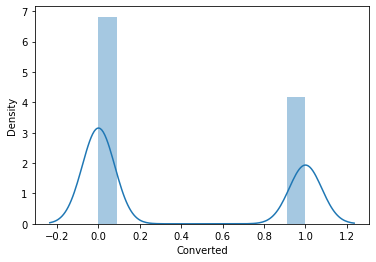

In [29]:
sns.distplot(lead_data['Converted'])
plt.show()

In [30]:
lead_data['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.536746
API                        0.393057
Lead Add Form              0.066791
Lead Import                0.003405
Name: Lead Origin, dtype: float64

In [31]:
lead_data['Lead Origin'].describe()

count                        9103
unique                          4
top       Landing Page Submission
freq                         4886
Name: Lead Origin, dtype: object

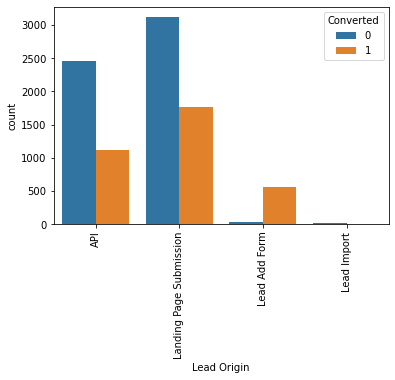

In [32]:
sns.countplot(x='Lead Origin',hue='Converted',data=lead_data)
plt.xticks(rotation='vertical')
plt.show()

In [33]:
lead_data['Lead Source'].value_counts(normalize=True)

Google               0.318247
Direct Traffic       0.279358
Olark Chat           0.192574
Organic Search       0.126771
Reference            0.048665
Welingak Website     0.014171
Referral Sites       0.013732
Facebook             0.003405
bing                 0.000659
google               0.000549
Click2call           0.000439
Press_Release        0.000220
Social Media         0.000220
Live Chat            0.000220
youtubechannel       0.000110
testone              0.000110
Pay per Click Ads    0.000110
welearnblog_Home     0.000110
WeLearn              0.000110
blog                 0.000110
NC_EDM               0.000110
Name: Lead Source, dtype: float64

In [34]:
lead_data['Lead Source'].describe()

count       9103
unique        21
top       Google
freq        2897
Name: Lead Source, dtype: object

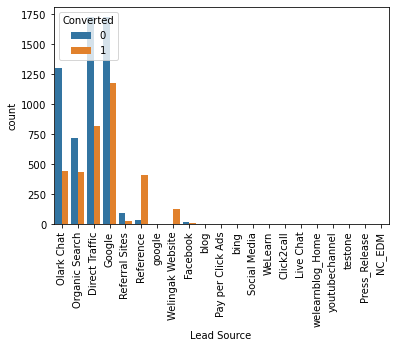

In [35]:
sns.countplot(x='Lead Source',hue='Converted',data=lead_data)
plt.xticks(rotation='vertical')
plt.show()

In [36]:
lead_data['Country'].value_counts(normalize=True)

India                   0.968472
United States           0.007580
United Arab Emirates    0.005822
Singapore               0.002636
Saudi Arabia            0.002307
United Kingdom          0.001648
Australia               0.001428
Qatar                   0.001099
Hong Kong               0.000769
Bahrain                 0.000769
Oman                    0.000659
France                  0.000659
unknown                 0.000549
South Africa            0.000439
Nigeria                 0.000439
Germany                 0.000439
Kuwait                  0.000439
Canada                  0.000439
Sweden                  0.000330
China                   0.000220
Asia/Pacific Region     0.000220
Uganda                  0.000220
Bangladesh              0.000220
Italy                   0.000220
Belgium                 0.000220
Netherlands             0.000220
Ghana                   0.000220
Philippines             0.000220
Russia                  0.000110
Switzerland             0.000110
Vietnam   

In [37]:
lead_data['Country'].describe()

count      9103
unique       38
top       India
freq       8816
Name: Country, dtype: object

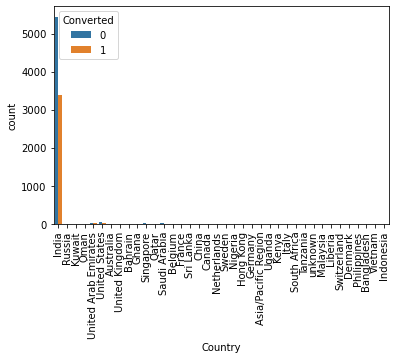

In [38]:
sns.countplot(x='Country',hue='Converted',data=lead_data)
plt.xticks(rotation='vertical')
plt.show()

In [39]:
lead_data['Specialization'].value_counts(normalize=True)

Finance Management                   0.468637
Human Resource Management            0.092058
Marketing Management                 0.090520
Operations Management                0.054927
Business Administration              0.043832
IT Projects Management               0.040207
Supply Chain Management              0.038009
Banking, Investment And Insurance    0.036801
Media and Advertising                0.022190
Travel and Tourism                   0.022190
International Business               0.019334
Healthcare Management                0.017247
E-COMMERCE                           0.012194
Hospitality Management               0.012194
Retail Management                    0.010985
Rural and Agribusiness               0.008019
E-Business                           0.006262
Services Excellence                  0.004394
Name: Specialization, dtype: float64

In [40]:
lead_data['Specialization'].describe()

count                   9103
unique                    18
top       Finance Management
freq                    4266
Name: Specialization, dtype: object

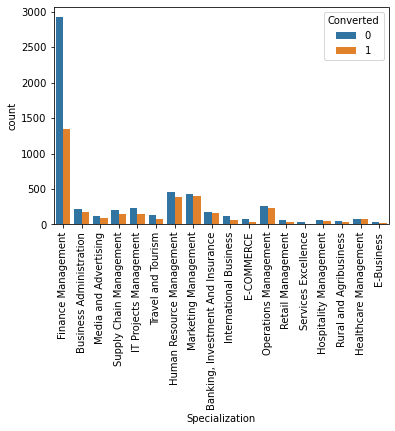

In [41]:
sns.countplot(x='Specialization',hue='Converted',data=lead_data)
plt.xticks(rotation='vertical')
plt.show()

In [42]:
lead_data['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.899154
Working Professional    0.074591
Student                 0.022740
Other                   0.001648
Housewife               0.000989
Businessman             0.000879
Name: What is your current occupation, dtype: float64

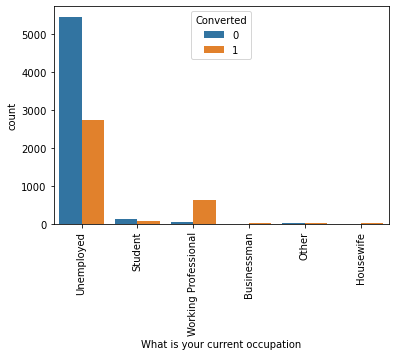

In [43]:
sns.countplot(x='What is your current occupation',hue='Converted',data=lead_data)
plt.xticks(rotation='vertical')
plt.show()

In [44]:
lead_data['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.99978
Flexibility & Convenience    0.00011
Other                        0.00011
Name: What matters most to you in choosing a course, dtype: float64

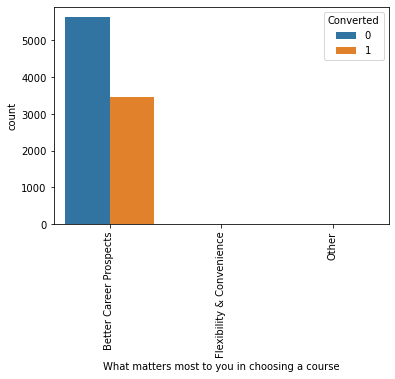

In [45]:
sns.countplot(x='What matters most to you in choosing a course',hue='Converted',data=lead_data)
plt.xticks(rotation='vertical')
plt.show()

In [46]:
lead_data['City'].value_counts(normalize=True)

Mumbai                         0.744700
Thane & Outskirts              0.081951
Other Cities                   0.074701
Other Cities of Maharashtra    0.049105
Other Metro Cities             0.041415
Tier II Cities                 0.008129
Name: City, dtype: float64

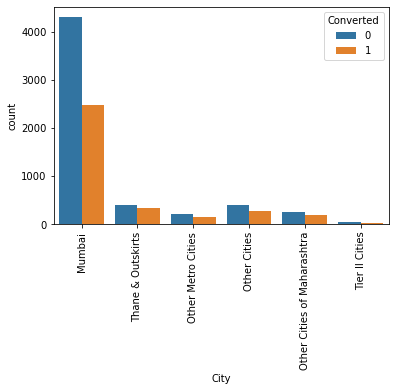

In [47]:
sns.countplot(x='City',hue='Converted',data=lead_data)
plt.xticks(rotation='vertical')
plt.show()

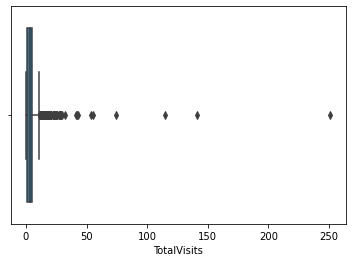

In [48]:
sns.boxplot(lead_data['TotalVisits'])
plt.show()

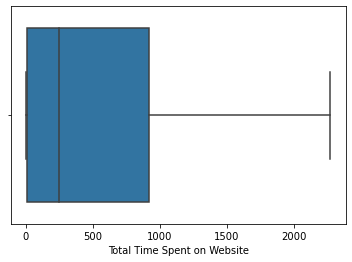

In [49]:
sns.boxplot(lead_data['Total Time Spent on Website'])
plt.show()

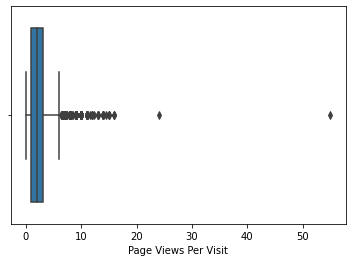

In [50]:
sns.boxplot(lead_data['Page Views Per Visit'])
plt.show()

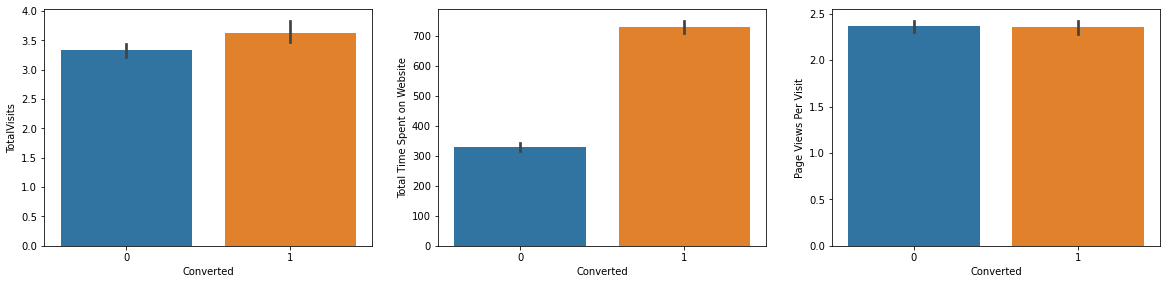

In [51]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(x='Converted',y = 'TotalVisits' , data = lead_data)
plt.subplot(4,3,2)
sns.barplot(x='Converted',y = 'Total Time Spent on Website', data = lead_data)
plt.subplot(4,3,3)
sns.barplot(x='Converted',y = 'Page Views Per Visit', data = lead_data)
plt.show()

# 3. Data Preparation

In [52]:
# Converting Binary variables(Yes/No) into 1/0
lead_data["A free copy of Mastering The Interview"]=lead_data["A free copy of Mastering The Interview"].replace({'No': 0, 'Yes': 1})

In [53]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data[["Lead Origin","Lead Source","Country","Specialization","What is your current occupation","What matters most to you in choosing a course","City"]],drop_first=True)
lead_data = pd.concat([lead_data, dummy1], axis=1)

In [54]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,India,Finance Management,...,0,1,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,India,Finance Management,...,0,1,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,India,Business Administration,...,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,India,Media and Advertising,...,0,1,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,India,Finance Management,...,0,1,0,0,0,0,0,0,0,0


In [55]:
# Droping repeated categorical variable
lead_data.drop(["Lead Origin","Lead Source","Country","Specialization","What is your current occupation","What matters most to you in choosing a course","City"],axis=1,inplace=True)

In [56]:
lead_data.head()

,Prospect ID,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0.0,0,0.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,5.0,674,2.5,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,1,2.0,1532,2.0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,1.0,305,1.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,1,2.0,1428,1.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [57]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 96 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Prospect ID                                                              9103 non-null   object 
 1   Lead Number                                                              9103 non-null   int64  
 2   Converted                                                                9103 non-null   int64  
 3   TotalVisits                                                              9103 non-null   float64
 4   Total Time Spent on Website                                              9103 non-null   int64  
 5   Page Views Per Visit                                                     9103 non-null   float64
 6   A free copy of Mastering The Interview                                  

Found that all variables are numeric now.

# 4. Train-Test Split and Feature Scaling

TRAIN-TEST SPLIT

In [58]:
# Train/Test splitup
from sklearn.model_selection import train_test_split

In [59]:
# Putting feature variable to X
X = lead_data.drop(['Converted','Prospect ID','Lead Number'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [60]:
# Putting response variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [61]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

FEATURE SCALING

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
7962,-0.092900,1.476324,-0.394072,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
5520,0.695064,-0.771066,2.111481,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1962,0.301082,-0.571257,0.061483,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1566,2.074000,1.393834,0.517039,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
9170,-0.683873,-0.881052,-1.077404,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [64]:
# Checking the convert Rate
convert = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
convert

38.02043282434362

# 5. Model Building

In [65]:
import statsmodels.api as sm

In [66]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

Feature selection by RFE for 18 variables.

In [67]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 18)             # running RFE with 18 variables as output
rfe = rfe.fit(X_train, y_train)

In [68]:
rfe.support_

array([False,  True, False, False, False,  True,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False,  True])

In [69]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 47),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 71),
 ('A free copy of Mastering The Interview', False, 69),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 20),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 64),
 ('Lead Source_Live Chat', False, 21),
 ('Lead Source_NC_EDM', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 48),
 ('Lead Source_Pay per Click Ads', False, 38),
 ('Lead Source_Press_Release', False, 75),
 ('Lead Source_Reference', False, 22),
 ('Lead Source_Referral Sites', False, 8),
 ('Lead Source_Social Media', False, 28),
 ('Lead Source_WeLearn', False, 17),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 9),
 ('Lead Source_blog', False, 19),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 

In [70]:
col = X_train.columns[rfe.support_]

In [71]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Country_Australia', 'Country_Bahrain',
       'Country_Bangladesh', 'Country_Belgium', 'Country_Canada',
       'Country_China', 'Country_Denmark', 'Country_France', 'Country_Germany',
       'Country_Ghana', 'Country_Hong Kong', 'Country_India',
       'Country_Indonesia', 'Country_Kenya', 'Country_Liberia',
       'Country_Malaysia', 'Country_Netherlands', 'Country_Nigeria',
       

In [72]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3044.2
Date:                Tue, 18 Oct 2022   Deviance:                       6088.4
Time:                        17:44:49   Pearson chi2:                 6.51e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -0.5390      1.022     -0.527      0.598      -2.542       1.464
Total Time Spent on Website                                                 1.1211      0.037     30.114      0.000       1.048       1.194
Lead Origin_Lead Add Form                                                   4.0919      0.217     18.844      0.000       3.666       4.518
Lead Origin_Lead Import                                                     1.1434      1.609      0.711      0.477      -2.010       4.297
Lead Source_Facebook                                                        0.1454      1.608      0.090      0.928      -3.007       3.298
Lead Source_Olark Chat                                                      0.7426      0.092      8.094      0.000       0.563       0.922
Lead Source_Welingak Website                                                1.8502      0.745      2.485      0.013       0.391       3.310
Lead Source_google                                                        -23.0538   4.18e+04     -0.001      1.000   -8.19e+04    8.18e+04
Country_Italy                                                             -23.7032   4.36e+04     -0.001      1.000   -8.55e+04    8.55e+04
Country_Kuwait                                                            -23.4321   4.49e+04     -0.001      1.000   -8.81e+04    8.81e+04
Country_Oman                                                                0.7857      0.951      0.826      0.409      -1.079       2.650
Country_Qatar                                                             -22.1208   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
What is your current occupation_Housewife                                  23.3841   2.61e+04      0.001      0.999   -5.11e+04    5.11e+04
What is your current occupation_Other                                      -0.3033      1.212     -0.250      0.802      -2.679       2.072
What is your current occupation_Student                                    -0.4016      1.044     -0.385      0.700      -2.447       1.644
What is your current occupation_Unemployed                                 -0.6022      1.022     -0.589      0.556      -2.606       1.402
What is your current occupation_Working Professional                        2.2316      1.036      2.153      0.031       0.201       4.263
What matters most to you in choosing a course_Flexibility & Convenience    24.9525   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
City_Tier II Cities                                                        -0.6037      0.392     -1.540      0.124      -1.372       0.165
===

In [73]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Import,13.31
3,Lead Source_Facebook,13.31
1,Lead Origin_Lead Add Form,1.54
4,Lead Source_Olark Chat,1.52
14,What is your current occupation_Unemployed,1.40
5,Lead Source_Welingak Website,1.32
0,Total Time Spent on Website,1.28
15,What is your current occupation_Working Profes...,1.13
13,What is your current occupation_Student,1.02
17,City_Tier II Cities,1.01


In [75]:
# Dropping high P-value & high VIF
col = col.drop('Lead Source_Facebook', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Lead Source_google', 'Country_Italy',
       'Country_Kuwait', 'Country_Oman', 'Country_Qatar',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'City_Tier II Cities'],
      dtype='object')

In [76]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3044.2
Date:                Tue, 18 Oct 2022   Deviance:                       6088.4
Time:                        17:45:09   Pearson chi2:                 6.51e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -0.5390      1.022     -0.527      0.598      -2.542       1.464
Total Time Spent on Website                                                 1.1211      0.037     30.114      0.000       1.048       1.194
Lead Origin_Lead Add Form                                                   4.0918      0.217     18.844      0.000       3.666       4.517
Lead Origin_Lead Import                                                     1.2831      0.440      2.916      0.004       0.421       2.145
Lead Source_Olark Chat                                                      0.7425      0.092      8.094      0.000       0.563       0.922
Lead Source_Welingak Website                                                1.8502      0.745      2.485      0.013       0.391       3.310
Lead Source_google                                                        -23.0538   4.18e+04     -0.001      1.000   -8.19e+04    8.18e+04
Country_Italy                                                             -23.7032   4.36e+04     -0.001      1.000   -8.55e+04    8.55e+04
Country_Kuwait                                                            -23.4321   4.49e+04     -0.001      1.000   -8.81e+04    8.81e+04
Country_Oman                                                                0.7857      0.951      0.826      0.409      -1.079       2.650
Country_Qatar                                                             -22.1208   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
What is your current occupation_Housewife                                  23.3841   2.61e+04      0.001      0.999   -5.11e+04    5.11e+04
What is your current occupation_Other                                      -0.3033      1.212     -0.250      0.802      -2.679       2.072
What is your current occupation_Student                                    -0.4004      1.044     -0.384      0.701      -2.446       1.645
What is your current occupation_Unemployed                                 -0.6022      1.022     -0.589      0.556      -2.606       1.402
What is your current occupation_Working Professional                        2.2316      1.036      2.154      0.031       0.201       4.263
What matters most to you in choosing a course_Flexibility & Convenience    24.9525   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
City_Tier II Cities                                                        -0.6037      0.392     -1.540      0.124      -1.372       0.165
===========================================================================================================================================
"""

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.54
3,Lead Source_Olark Chat,1.52
13,What is your current occupation_Unemployed,1.40
4,Lead Source_Welingak Website,1.32
0,Total Time Spent on Website,1.28
14,What is your current occupation_Working Profes...,1.13
12,What is your current occupation_Student,1.01
16,City_Tier II Cities,1.01
2,Lead Origin_Lead Import,1.01
7,Country_Kuwait,1.00


In [78]:
# Dropping high P-value variables
col = col.drop('What matters most to you in choosing a course_Flexibility & Convenience', 1)

In [79]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3045.8
Date:                Tue, 18 Oct 2022   Deviance:                       6091.6
Time:                        17:45:21   Pearson chi2:                 6.51e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5399      1.022     -0.528      0.597      -2.543       1.463
Total Time Spent on Website                              1.1210      0.037     30.111      0.000       1.048       1.194
Lead Origin_Lead Add Form                                4.0917      0.217     18.843      0.000       3.666       4.517
Lead Origin_Lead Import                                  1.2829      0.440      2.916      0.004       0.421       2.145
Lead Source_Olark Chat                                   0.7464      0.092      8.143      0.000       0.567       0.926
Lead Source_Welingak Website                             1.8502      0.745      2.484      0.013       0.391       3.310
Lead Source_google                                     -23.0539   4.18e+04     -0.001      1.000   -8.19e+04    8.18e+04
Country_Italy                                          -23.7031   4.36e+04     -0.001      1.000   -8.55e+04    8.55e+04
Country_Kuwait                                         -23.4320   4.49e+04     -0.001      1.000   -8.81e+04    8.81e+04
Country_Oman                                             0.7847      0.951      0.825      0.409      -1.079       2.649
Country_Qatar                                          -22.1210   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
What is your current occupation_Housewife               23.3850   2.61e+04      0.001      0.999   -5.11e+04    5.12e+04
What is your current occupation_Other                   -0.3026      1.212     -0.250      0.803      -2.678       2.072
What is your current occupation_Student                 -0.4005      1.043     -0.384      0.701      -2.446       1.645
What is your current occupation_Unemployed              -0.6012      1.022     -0.588      0.556      -2.605       1.402
What is your current occupation_Working Professional     2.2319      1.036      2.154      0.031       0.201       4.263
City_Tier II Cities                                     -0.6037      0.392     -1.540      0.124      -1.372       0.165
========================================================================================================================
"""

In [80]:
col = col.drop('Country_Qatar', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3047.3
Date:                Tue, 18 Oct 2022   Deviance:                       6094.7
Time:                        17:45:34   Pearson chi2:                 6.52e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5406      1.022     -0.529      0.597      -2.544       1.463
Total Time Spent on Website                              1.1221      0.037     30.140      0.000       1.049       1.195
Lead Origin_Lead Add Form                                4.0949      0.217     18.858      0.000       3.669       4.520
Lead Origin_Lead Import                                  1.2862      0.440      2.923      0.003       0.424       2.149
Lead Source_Olark Chat                                   0.7496      0.092      8.177      0.000       0.570       0.929
Lead Source_Welingak Website                             1.8503      0.745      2.485      0.013       0.391       3.310
Lead Source_google                                     -23.0523   4.18e+04     -0.001      1.000   -8.19e+04    8.18e+04
Country_Italy                                          -23.7026   4.36e+04     -0.001      1.000   -8.55e+04    8.55e+04
Country_Kuwait                                         -23.4311   4.49e+04     -0.001      1.000   -8.81e+04     8.8e+04
Country_Oman                                             0.7865      0.951      0.827      0.408      -1.078       2.651
What is your current occupation_Housewife               23.3856   2.61e+04      0.001      0.999   -5.11e+04    5.11e+04
What is your current occupation_Other                   -0.3030      1.212     -0.250      0.803      -2.678       2.072
What is your current occupation_Student                 -0.4006      1.044     -0.384      0.701      -2.446       1.645
What is your current occupation_Unemployed              -0.6028      1.023     -0.590      0.555      -2.607       1.401
What is your current occupation_Working Professional     2.2322      1.036      2.154      0.031       0.201       4.263
City_Tier II Cities                                     -0.6021      0.392     -1.536      0.125      -1.371       0.166
========================================================================================================================
"""

In [81]:
col = col.drop('Lead Source_google', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3048.9
Date:                Tue, 18 Oct 2022   Deviance:                       6097.7
Time:                        17:45:41   Pearson chi2:                 6.52e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5410      1.022     -0.529      0.597      -2.544       1.462
Total Time Spent on Website                              1.1215      0.037     30.135      0.000       1.049       1.194
Lead Origin_Lead Add Form                                4.0956      0.217     18.861      0.000       3.670       4.521
Lead Origin_Lead Import                                  1.2869      0.440      2.925      0.003       0.425       2.149
Lead Source_Olark Chat                                   0.7504      0.092      8.185      0.000       0.571       0.930
Lead Source_Welingak Website                             1.8504      0.745      2.485      0.013       0.391       3.310
Country_Italy                                          -22.7002   2.65e+04     -0.001      0.999   -5.19e+04    5.18e+04
Country_Kuwait                                         -22.4289   2.73e+04     -0.001      0.999   -5.34e+04    5.34e+04
Country_Oman                                             0.7876      0.951      0.828      0.408      -1.077       2.652
What is your current occupation_Housewife               22.3859   1.58e+04      0.001      0.999    -3.1e+04     3.1e+04
What is your current occupation_Other                   -0.3023      1.212     -0.249      0.803      -2.677       2.073
What is your current occupation_Student                 -0.4005      1.044     -0.384      0.701      -2.446       1.645
What is your current occupation_Unemployed              -0.6038      1.022     -0.591      0.555      -2.608       1.400
What is your current occupation_Working Professional     2.2323      1.036      2.154      0.031       0.201       4.263
City_Tier II Cities                                     -0.6006      0.392     -1.532      0.126      -1.369       0.168
========================================================================================================================
"""

In [82]:
col = col.drop('What is your current occupation_Housewife', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3051.3
Date:                Tue, 18 Oct 2022   Deviance:                       6102.6
Time:                        17:45:56   Pearson chi2:                 6.52e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7527      0.741      1.016      0.310      -0.700       2.205
Total Time Spent on Website                              1.1216      0.037     30.147      0.000       1.049       1.194
Lead Origin_Lead Add Form                                4.0939      0.217     18.854      0.000       3.668       4.520
Lead Origin_Lead Import                                  1.2866      0.440      2.924      0.003       0.424       2.149
Lead Source_Olark Chat                                   0.7484      0.092      8.165      0.000       0.569       0.928
Lead Source_Welingak Website                             1.8517      0.745      2.487      0.013       0.392       3.311
Country_Italy                                          -21.7005    1.6e+04     -0.001      0.999   -3.15e+04    3.14e+04
Country_Kuwait                                         -21.4292   1.65e+04     -0.001      0.999   -3.24e+04    3.24e+04
Country_Oman                                             0.7876      0.951      0.828      0.408      -1.077       2.652
What is your current occupation_Other                   -1.5958      0.987     -1.618      0.106      -3.530       0.338
What is your current occupation_Student                 -1.6936      0.771     -2.197      0.028      -3.204      -0.183
What is your current occupation_Unemployed              -1.8971      0.742     -2.557      0.011      -3.351      -0.443
What is your current occupation_Working Professional     0.9390      0.761      1.234      0.217      -0.552       2.430
City_Tier II Cities                                     -0.6010      0.392     -1.533      0.125      -1.369       0.167
========================================================================================================================
"""

In [83]:
col = col.drop('Country_Kuwait', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3052.7
Date:                Tue, 18 Oct 2022   Deviance:                       6105.4
Time:                        17:46:04   Pearson chi2:                 6.52e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7526      0.741      1.016      0.310      -0.700       2.205
Total Time Spent on Website                              1.1203      0.037     30.137      0.000       1.047       1.193
Lead Origin_Lead Add Form                                4.0935      0.217     18.852      0.000       3.668       4.519
Lead Origin_Lead Import                                  1.2861      0.440      2.923      0.003       0.424       2.148
Lead Source_Olark Chat                                   0.7481      0.092      8.162      0.000       0.568       0.928
Lead Source_Welingak Website                             1.8517      0.745      2.487      0.013       0.392       3.311
Country_Italy                                          -21.6975    1.6e+04     -0.001      0.999   -3.15e+04    3.14e+04
Country_Oman                                             0.7881      0.951      0.829      0.407      -1.076       2.652
What is your current occupation_Other                   -1.5948      0.986     -1.617      0.106      -3.528       0.338
What is your current occupation_Student                 -1.6935      0.771     -2.198      0.028      -3.204      -0.183
What is your current occupation_Unemployed              -1.8976      0.742     -2.558      0.011      -3.351      -0.444
What is your current occupation_Working Professional     0.9389      0.760      1.235      0.217      -0.552       2.429
City_Tier II Cities                                     -0.5998      0.392     -1.530      0.126      -1.368       0.169
========================================================================================================================
"""

In [84]:
col = col.drop('Country_Italy', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3054.4
Date:                Tue, 18 Oct 2022   Deviance:                       6108.7
Time:                        17:46:08   Pearson chi2:                 6.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7525      0.741      1.016      0.310      -0.699       2.204
Total Time Spent on Website                              1.1187      0.037     30.122      0.000       1.046       1.191
Lead Origin_Lead Add Form                                4.0925      0.217     18.849      0.000       3.667       4.518
Lead Origin_Lead Import                                  1.2851      0.440      2.921      0.003       0.423       2.147
Lead Source_Olark Chat                                   0.7473      0.092      8.155      0.000       0.568       0.927
Lead Source_Welingak Website                             1.8517      0.745      2.487      0.013       0.392       3.311
Country_Oman                                             0.7886      0.951      0.829      0.407      -1.075       2.652
What is your current occupation_Other                   -1.5935      0.986     -1.616      0.106      -3.526       0.339
What is your current occupation_Student                 -1.6932      0.770     -2.198      0.028      -3.203      -0.183
What is your current occupation_Unemployed              -1.8981      0.742     -2.560      0.010      -3.351      -0.445
What is your current occupation_Working Professional     0.9389      0.760      1.235      0.217      -0.551       2.429
City_Tier II Cities                                     -0.5984      0.392     -1.527      0.127      -1.366       0.170
========================================================================================================================
"""

In [85]:
col = col.drop('Country_Oman', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3054.7
Date:                Tue, 18 Oct 2022   Deviance:                       6109.4
Time:                        17:46:17   Pearson chi2:                 6.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7526      0.741      1.016      0.310      -0.699       2.204
Total Time Spent on Website                              1.1184      0.037     30.118      0.000       1.046       1.191
Lead Origin_Lead Add Form                                4.0914      0.217     18.844      0.000       3.666       4.517
Lead Origin_Lead Import                                  1.2839      0.440      2.918      0.004       0.422       2.146
Lead Source_Olark Chat                                   0.7469      0.092      8.152      0.000       0.567       0.926
Lead Source_Welingak Website                             1.8517      0.745      2.487      0.013       0.392       3.311
What is your current occupation_Other                   -1.5933      0.986     -1.616      0.106      -3.526       0.339
What is your current occupation_Student                 -1.6931      0.770     -2.198      0.028      -3.203      -0.183
What is your current occupation_Unemployed              -1.8971      0.741     -2.558      0.011      -3.350      -0.444
What is your current occupation_Working Professional     0.9403      0.760      1.237      0.216      -0.550       2.430
City_Tier II Cities                                     -0.5993      0.392     -1.529      0.126      -1.367       0.169
========================================================================================================================
"""

In [86]:
col = col.drop('What is your current occupation_Working Professional', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6362
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3055.4
Date:                Tue, 18 Oct 2022   Deviance:                       6110.8
Time:                        17:46:31   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.6525      0.167      9.875      0.000       1.324       1.980
Total Time Spent on Website                    1.1187      0.037     30.126      0.000       1.046       1.191
Lead Origin_Lead Add Form                      4.0922      0.217     18.849      0.000       3.667       4.518
Lead Origin_Lead Import                        1.2860      0.440      2.925      0.003       0.424       2.148
Lead Source_Olark Chat                         0.7474      0.092      8.159      0.000       0.568       0.927
Lead Source_Welingak Website                   1.8513      0.745      2.486      0.013       0.392       3.311
What is your current occupation_Other         -2.4934      0.672     -3.710      0.000      -3.811      -1.176
What is your current occupation_Student       -2.5932      0.270     -9.612      0.000      -3.122      -2.064
What is your current occupation_Unemployed    -2.7972      0.170    -16.415      0.000      -3.131      -2.463
City_Tier II Cities                           -0.5959      0.391     -1.523      0.128      -1.363       0.171
==============================================================================================================
"""

In [87]:
col = col.drop('City_Tier II Cities', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6363
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3056.6
Date:                Tue, 18 Oct 2022   Deviance:                       6113.2
Time:                        17:46:39   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.6438      0.167      9.832      0.000       1.316       1.971
Total Time Spent on Website                    1.1187      0.037     30.137      0.000       1.046       1.191
Lead Origin_Lead Add Form                      4.0975      0.217     18.875      0.000       3.672       4.523
Lead Origin_Lead Import                        1.2918      0.440      2.939      0.003       0.430       2.153
Lead Source_Olark Chat                         0.7531      0.092      8.226      0.000       0.574       0.933
Lead Source_Welingak Website                   1.8516      0.745      2.486      0.013       0.392       3.311
What is your current occupation_Other         -2.4852      0.672     -3.698      0.000      -3.802      -1.168
What is your current occupation_Student       -2.5862      0.270     -9.588      0.000      -3.115      -2.058
What is your current occupation_Unemployed    -2.7942      0.170    -16.403      0.000      -3.128      -2.460
==============================================================================================================
"""

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.48
1,Lead Origin_Lead Add Form,1.40
7,What is your current occupation_Unemployed,1.36
4,Lead Source_Welingak Website,1.30
0,Total Time Spent on Website,1.23
2,Lead Origin_Lead Import,1.01
6,What is your current occupation_Student,1.01
5,What is your current occupation_Other,1.00


In [89]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.622745
5520    0.117844
1962    0.143137
1566    0.960951
9170    0.200535
5097    0.200535
8954    0.207114
309     0.168442
5519    0.200535
1050    0.524285
dtype: float64

In [90]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.62274518, 0.11784368, 0.14313675, 0.96095072, 0.20053461,
       0.20053461, 0.20711351, 0.16844239, 0.20053461, 0.52428528])

In [91]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_prob':y_train_pred})
y_train_pred_final['Prospect_ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_prob,Prospect_ID
0,0,0.622745,7962
1,0,0.117844,5520
2,0,0.143137,1962
3,1,0.960951,1566
4,0,0.200535,9170


In [92]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_prob,Prospect_ID,predicted
0,0,0.622745,7962,1
1,0,0.117844,5520,0
2,0,0.143137,1962,0
3,1,0.960951,1566,1
4,0,0.200535,9170,0


In [93]:
from sklearn import metrics

In [94]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.7768361581920904


Final model with overall accuracy rate is 78%.

FINDING ROC CURVE

In [95]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [96]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_prob, drop_intermediate = False )

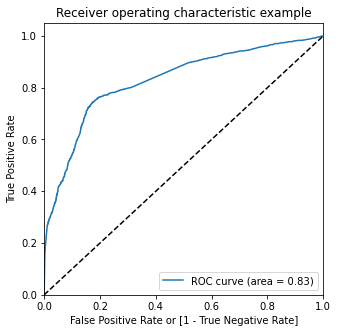

In [97]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_prob)

 FINDING OPTIMAL CUTOFF POINT

In [98]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_prob,Prospect_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.622745,7962,1,1,1,1,1,1,1,1,0,0,0
1,0,0.117844,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.143137,1962,0,1,1,0,0,0,0,0,0,0,0
3,1,0.960951,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.200535,9170,0,1,1,1,0,0,0,0,0,0,0


In [99]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.379630  1.000000  0.000000
0.2   0.2  0.638261  0.897065  0.479889
0.3   0.3  0.791431  0.754031  0.814318
0.4   0.4  0.793315  0.700703  0.849987
0.5   0.5  0.776836  0.619264  0.873261
0.6   0.6  0.762241  0.525424  0.907159
0.7   0.7  0.747018  0.419181  0.947635
0.8   0.8  0.723321  0.312112  0.974956
0.9   0.9  0.688167  0.184787  0.996205


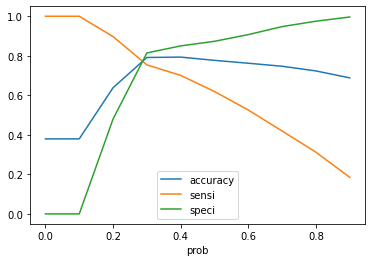

In [100]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above curve, 0.28 is the optimum point to take it as a cutoff probability.

In [101]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

,Convert,Convert_prob,Prospect_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.622745,7962,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.117844,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.143137,1962,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.960951,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.200535,9170,0,1,1,1,0,0,0,0,0,0,0,0


In [102]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.7889202762084118

 Accuracy achieved is 79%.

In [103]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted )
confusion2

array([[3186,  767],
       [ 578, 1841]], dtype=int64)

In [104]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [105]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7610582885489872

Sensitivity achieved is 77%.

 PRECISION AND RECALL

In [106]:
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
confusion

array([[3452,  501],
       [ 921, 1498]], dtype=int64)

In [107]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7493746873436719

In [108]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6192641587432823

PRECISION AND RECALL TRADEOFF

In [109]:
from sklearn.metrics import precision_recall_curve

In [110]:
y_train_pred_final.Convert, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Convert, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: predicted, Length: 6372, dtype: int64)

In [111]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_prob)

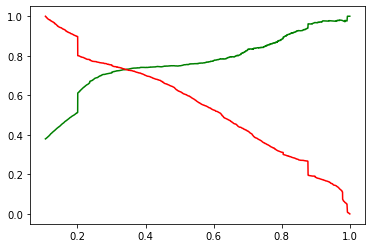

In [112]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

 Trade cutoff obtained is 0.36.

MODEL EVALUATION WITH TEST DATA

In [113]:
# Scaling test data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [114]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed
3504,-0.103815,0,0,0,0,0,0,1
4050,-0.881052,1,0,0,0,0,0,1
7201,0.424120,0,0,0,0,0,0,1
1196,-0.105648,0,0,0,0,0,0,1
8219,-0.428274,0,0,0,0,0,0,1


In [115]:
X_test_sm = sm.add_constant(X_test)

In [116]:
y_test_pred = res.predict(X_test_sm)

In [117]:
y_test_pred[:10]

3504    0.219851
4050    0.876690
7201    0.337173
1196    0.219499
8219    0.163896
8747    0.200535
9048    0.805331
6524    0.143893
7693    0.137692
8187    0.876690
dtype: float64

In [118]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [119]:
# Let's see the head
y_pred_1.head()

,0
3504,0.219851
4050,0.876690
7201,0.337173
1196,0.219499
8219,0.163896


In [120]:
y_test_df = pd.DataFrame(y_test)
y_test_df['ProspectID'] = y_test_df.index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,ProspectID,0
0,0,3504,0.219851
1,1,4050,0.876690
2,0,7201,0.337173
3,0,1196,0.219499
4,1,8219,0.163896


In [121]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_prob'})
y_pred_final = y_pred_final.reindex(['ProspectID','Converted','Convert_prob'], axis=1)

In [122]:
y_pred_final.head()

,ProspectID,Converted,Convert_prob
0,3504,0,0.219851
1,4050,1,0.876690
2,7201,0,0.337173
3,1196,0,0.219499
4,8219,1,0.163896


In [123]:
y_pred_final['final_predicted'] = y_pred_final.Convert_prob.map(lambda x: 1 if x > 0.36 else 0)

In [124]:
y_pred_final.head()

,ProspectID,Converted,Convert_prob,final_predicted
0,3504,0,0.219851,0
1,4050,1,0.876690,1
2,7201,0,0.337173,0
3,1196,0,0.219499,0
4,8219,1,0.163896,0


In [125]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7986085682900037

Accuracy achieved is 80%.

Accuracy of train data is 79% and test data is 80%.

In [126]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1422,  267],
       [ 283,  759]], dtype=int64)

In [127]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [128]:
# SENSITIVITY
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7284069097888676

In [129]:
# SPECIFICITY
# Let's calculate specificity
TN / float(TN+FP)

0.8419182948490231

# 6. Lead score of the model 

In [130]:
y_pred_final['Lead score'] = y_pred_final.Convert_prob.map(lambda x: x*100)

In [131]:
y_pred_final.head()

,ProspectID,Converted,Convert_prob,final_predicted,Lead score
0,3504,0,0.219851,0,21.985096
1,4050,1,0.876690,1,87.668995
2,7201,0,0.337173,0,33.717311
3,1196,0,0.219499,0,21.949943
4,8219,1,0.163896,0,16.389628
